Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Connor McDonald"
StudentNumber = "u16040725"

---

# MIT 804 2021: Homework 3, part 2 [25 points]
## The last of the local search

**You will learn how to:**
- Perform multidimensional optmisation
- Perform Simulated annealing

By Dr. Vukosi Marivate, MIT 804, University of Pretoria

In [2]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

## 1 Create a fitness function, through a python function [2 points]

Expanding from part 1, we are now going to deal with 2D fitness functions. We are going to be maximising the following function:

output = $-(x_1^2+x_2^2)$

**Hint**: Use the `np.square` function or x**2 

In [3]:
def fitness_function_2d(X):
    output = -1*((X[0])**2+(X[1])**2)
#     raise NotImplementedError()
    return output

In [4]:
fitness_function_2d([1,2]) 

-5

In [5]:
"""Check that squares returns the correct output for several inputs"""
assert fitness_function_2d([1,2]) == -5
assert fitness_function_2d([2,2]) == -8
assert fitness_function_2d([-3,2]) == -13

In [6]:
# Create a range of x values from 10 to 10 with step size 1
x1_range = np.arange(-10,11,1) # Generate numbers from -10 to 10 as stps of one
x2_range = np.arange(-10,11,1)

X1,X2 = np.meshgrid(x1_range, x2_range)
X1X2 = np.array([X1.flatten(),X2.flatten()]).T

output_list = []
for x1x2 in X1X2: # Loop through the x values
    output = fitness_function_2d(x1x2) # Calculate the fitness function
    output_list.append(output) # Store the fitness function in the python list

print("x input: ", X1X2[:10])
print("fitness ouput: ",output_list[:10])

x input:  [[-10 -10]
 [ -9 -10]
 [ -8 -10]
 [ -7 -10]
 [ -6 -10]
 [ -5 -10]
 [ -4 -10]
 [ -3 -10]
 [ -2 -10]
 [ -1 -10]]
fitness ouput:  [-200, -181, -164, -149, -136, -125, -116, -109, -104, -101]


## Plot the fitness function function and find the optimum

Text(0.5, 0, 'x2')

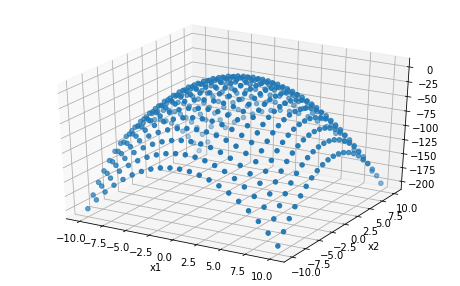

In [7]:
plt.figure(figsize=(8,5)) # Set the figure size
ax = plt.axes(projection='3d')
# plt.plot(x_range,output_list) # Simple plot, x vs fitness function
ax.scatter3D(X1X2[:,0],X1X2[:,1],output_list)
plt.grid() # Put a grid

# Label the plot
plt.xlabel("x1")
plt.ylabel("x2")

## 2 Create helper functions for initialisation and sampling the next point Y [5 points]

You must just now expand the initialisation you did in the first part of the homework to be able to take care of more than 1 dimension. 

Use the size variable in for your numpy functions

In [8]:
def initialise_X(num_dim):
    # Hint use the randint or uniform function
    X = []
    for i in range(0, num_dim):
        x = np.random.randint(-10,11)
        X.append(x)
#     raise NotImplementedError()
    return X

def sample_neighbour(X, num_dim):
    Y = []
    # Hint: use the uniform function
    for i in X:
        y = i + np.random.uniform(-1,1)
        Y.append(y)
#     raise NotImplementedError()
    return Y

In [9]:
X = initialise_X(3)
assert len(X) == 3
X = initialise_X(4)
assert len(X) == 4
X = initialise_X(10)
assert len(X) == 10
X = initialise_X(2)
assert len(X) == 2

Y = sample_neighbour(X, 2)
assert len(Y) == 2

In [10]:
def hill_climbing(fitness_function_2d, max_iteration):

    X = initialise_X(2)
    best_X = X
    best_fitness_value = fitness_function_2d(X)
    iteration = 0
    best_fitness_value_history = []
    
    while iteration < max_iteration:
        
        Y = sample_neighbour(X, 2)
        Y_fitness = fitness_function_2d(Y)
        
        if Y_fitness > best_fitness_value:
            best_X = Y
            best_fitness_value = Y_fitness
            best_fitness_value_history.append(best_fitness_value) 
            X = Y
            
        iteration +=1
    
    return best_X, best_fitness_value_history
    
    
# raise NotImplementedError()

In [11]:
best_X, best_fitness_value_history = hill_climbing(fitness_function_2d, max_iteration= 200000)
assert best_X[0] < 0.1
assert best_X[0] > -0.1
assert best_X[1] < 0.1
assert best_X[1] > -0.1

In [12]:
best_X, best_fitness_value_history = hill_climbing(fitness_function_2d, max_iteration= 20000)

In [13]:
best_X

[0.010051401245210423, -0.005416759575297192]

## Noisy Function

We now introduce a more complex and noisy fiteness function. Namely:
fitness function $\exp\left(\sin\left(50x\right)\right) + \sin\left(60e^y\right) + \sin\left(70 \sin x\right)+\sin\left(\sin\left(80y\right)\right) - \sin\left(10\left(x+y\right)\right) + 1/4\left(x^2 + y^2\right)$

In [14]:
def fitness_function_noisy(X):
    x1 = X[0]
    x2 = X[1]
    output = np.exp(np.sin(50.0*x1)) + np.sin(60*np.exp(x2)) + np.sin(70.0*np.sin(x1)) + np.sin(np.sin(80.0*x2)) - np.sin(10.0*(x1+x2))+0.25*(x1**2 + x2**2)
    return -1.0*output

x input:  [[-2.   -2.  ]
 [-1.95 -2.  ]
 [-1.9  -2.  ]
 [-1.85 -2.  ]
 [-1.8  -2.  ]
 [-1.75 -2.  ]
 [-1.7  -2.  ]
 [-1.65 -2.  ]
 [-1.6  -2.  ]
 [-1.55 -2.  ]]
fitness ouput:  [-4.421048320928907, -3.976885784950855, -4.382767891955277, -6.96454457098851, -4.073421396505581, -4.11406171905868, -2.7216646147785593, -1.3603911045196282, -3.3424214809159714, -1.1967010812572427]


Text(0.5, 0, 'x2')

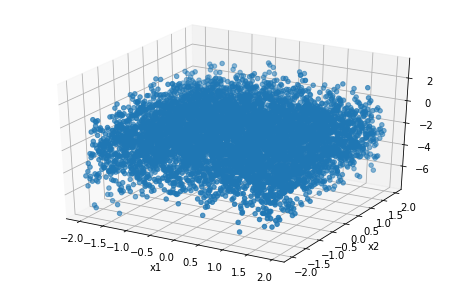

In [15]:
# Create a range of x values from 10 to 10 with step size 1
x1_range = np.arange(-2,2,0.05) # Generate numbers from -10 to 10 as stps of one
x2_range = np.arange(-2,2,0.05)

X1,X2 = np.meshgrid(x1_range, x2_range)
X1X2 = np.array([X1.flatten(),X2.flatten()]).T

output_list = []
for x1x2 in X1X2: # Loop through the x values
    output = fitness_function_noisy(x1x2) # Calculate the fitness function
    output_list.append(output) # Store the fitness function in the python list

print("x input: ", X1X2[:10])
print("fitness ouput: ",output_list[:10])

plt.figure(figsize=(8,5)) # Set the figure size
ax = plt.axes(projection='3d')
# plt.plot(x_range,output_list) # Simple plot, x vs fitness function
ax.scatter3D(X1X2[:,0],X1X2[:,1],output_list)
plt.grid() # Put a grid

# Label the plot
plt.xlabel("x1")
plt.ylabel("x2")

In [16]:
best_X, fitness_function_noisy(best_X)

([0.010051401245210423, -0.005416759575297192], -1.8261629562569963)

Text(0.5, 1.0, 'History of best_fitness_value saves')

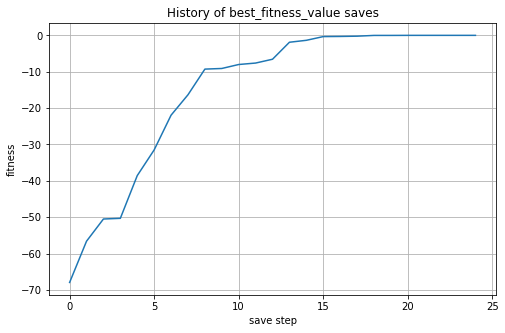

In [17]:
plt.figure(figsize=(8,5)) # Set the figure size
plt.plot(best_fitness_value_history)
plt.grid()
# Label the plot
plt.xlabel("save step")
plt.ylabel("fitness")
plt.title("History of best_fitness_value saves")

## 3 Simulated annealing [14 points]

See Lecture 3 slides for psuedo code from AIMA book.

You can also read a bit more about Simulated Annealing on [Scholarpedia](http://www.scholarpedia.org/article/Metaheuristic_Optimization#Simulated_Annealing)

In this assignment you will implment a simplified Simulated Annealing algorithm

### Sub-problem 1: Setting the annealing schedule 
With simulated annealing, one of the choices we have is on the annealing schedule. For this assignment, you must impliment a simple exponential decay function.

That is, given time $t$,temperature $T$, the schedule should be :

schedule = ${\alpha}^t  T$

where $\alpha < 1.0$

### Sub-problem 2: Main loop

We have to accept a current sample ($Y$) under 2 different scenarios.

With $\Delta E =$ *Y_fitness* - *X_fitness*

Scenario 1: The new fitness function *Y_fitness* is better than current *X_fitness*

Scenario 2: With some small probablity $p={e}^{\Delta E /T}$ we accept the current. Where $T$ is schedule temperature



In [18]:
def annealing_schedule(t, starting_temperature, alpha = 0.99):
    output = (alpha**t)*starting_temperature
#     raise NotImplementedError()
    return output

In [19]:
"""Check the probability decision function. """
starting_temperature = 100.0
alpha = 0.5
t = 0
T = annealing_schedule(t, starting_temperature, alpha = alpha)
assert T == starting_temperature
t = 1
T = annealing_schedule(t, starting_temperature, alpha = alpha)
assert T == 50

In [20]:
def calc_probability(delta_e, T):
    """Subproblem 2, helper fucntion for Scenario 2. Should return a True with a probability set by delta_e and T"""
    decision = False
    p = np.e**(delta_e/T)
    v = np.random.uniform(0,1)
    if v <= p:
        decision = True
#     raise NotImplementedError()
    return decision

In [21]:
"""Check the probability decision function. """
T = 1.0
delta_e = -0.5
hist = []
for i in range(1000):
    hist.append(calc_probability(delta_e,T))
avg_flip = np.mean(hist)
assert avg_flip < 0.65
assert avg_flip > 0.55


In [22]:
def simulated_annealing(fitness_function,num_dim = 2, schedule=annealing_schedule,  max_iteration = 10, starting_temperature = 1000):
    X = initialise_X(num_dim)
    best_X = X
    best_fitness_value = fitness_function(X)
    best_fitness_value_history = [] # Best fitness function we have seen
    explored_fitness_value_history = [] # All fitness functions we have accepted (whether good or random)
    
    for t in range(max_iteration):
        T = schedule(t, starting_temperature=starting_temperature)
        if T == 0:
            return best_X, best_fitness_value_history, explored_fitness_value_history
        
        Y = sample_neighbour(X, num_dim)
        Y_fitness = fitness_function(Y)
        X_fitness = fitness_function(X)
        delta_e = Y_fitness - X_fitness
        
        
        if delta_e > 0:
            best_X = Y
            best_fitness_value = Y_fitness
            best_fitness_value_history.append(best_fitness_value) 
            X = Y
        
        elif calc_probability(delta_e, T) == True:
            best_X = Y
            best_fitness_value = Y_fitness
            best_fitness_value_history.append(best_fitness_value) 
            X = Y
            
        explored_fitness_value_history.append(X_fitness)
#         raise NotImplementedError()
    return best_X, best_fitness_value_history, explored_fitness_value_history

In [23]:
starting_temperature = 10000.0
max_iteration = 1000
best_X, best_fitness_value_history, explored_fitness_value_history = simulated_annealing(fitness_function_noisy, 
                                                                         max_iteration = max_iteration, 
                                                                         starting_temperature = starting_temperature)

In [24]:
# We should converge to zero for the first fiteness function
starting_temperature = 10000.0
max_iteration = 10000
best_x, best_fitness_value_history,  explored_fitness_value_history = simulated_annealing(fitness_function_2d,
                                                                                          max_iteration= max_iteration,
                                                                                          starting_temperature = starting_temperature)
assert best_x[0] < 0.1
assert best_x[0] > -0.1
assert best_x[1] < 0.1
assert best_x[1] > -0.1
assert len(best_fitness_value_history) > 1
assert len(explored_fitness_value_history) > 1
# We should converge to a good number
best_x, best_fitness_value_history,  explored_fitness_value_history = simulated_annealing(fitness_function_noisy,
                                                                                          max_iteration= max_iteration,
                                                                                          starting_temperature = starting_temperature)

assert best_fitness_value_history[-1] > 0.0

Text(0.5, 1.0, 'History of best_fitness_value saves  - Noisy Fitness Function')

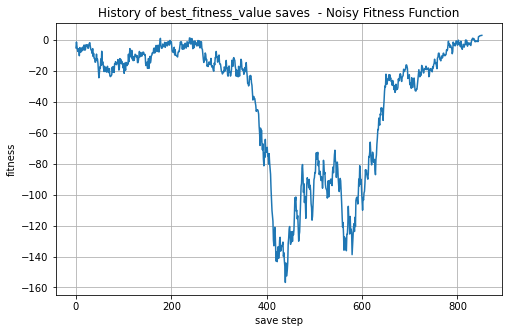

In [25]:
plt.figure(figsize=(8,5)) # Set the figure size
plt.plot(best_fitness_value_history)
plt.grid()
# Label the plot
plt.xlabel("save step")
plt.ylabel("fitness")
plt.title("History of best_fitness_value saves  - Noisy Fitness Function")

Text(0.5, 1.0, 'History of explored_fitness_value saves  - Noisy Fitness Function')

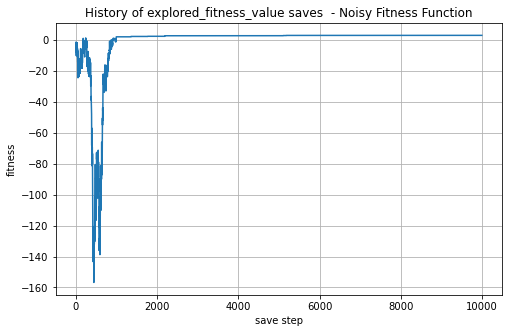

In [26]:
plt.figure(figsize=(8,5)) # Set the figure size
plt.plot(explored_fitness_value_history)
plt.grid()
# Label the plot
plt.xlabel("save step")
plt.ylabel("fitness")
plt.title("History of explored_fitness_value saves  - Noisy Fitness Function")

## 4 Simulated annealing behaviour [4 points]

1. What do you observe in the behaviour of Simulated annealing?
2. How can you improve the simulated annealing?

1. Unlike the vanilla hill climbing algorithim, simulated annealing combats the problem of multiple local maximums by moving to a worse successive point based off of a probability (p). This was an interesting yet intuitive approach. When a succesive point was worse than the current point the delta_e value was negative. By plotting the function e^x we can see that as x approaches negative infinity, the probability approaches 0, meaning that the likeliness of a worse succesive point being accepted decreased depending on how much worse the point was. However, whilst modifying the number of iterations the algorithm was allowed to run it was observed that too few iterations could actually lead to a worse result than some of the initial points. One should be carefull when making use of such an algorithm to not let it slowly decend to into worse positions especially if the exponent of e is not adequately defined. If the T value is too high this will result in very high probabilities of moving to a significantly worser point. 


2. Improving the simulated annealing algorithm can be done by knowing when to explore or when to exploit. When we have no prior knowledege of our function it is best to "cast a wide net" and use a large range as our search space since we have no idea of where the optimal point may be. As we explore more we get a better sense of the function and where our optimal point may lie, this is when we should narrow our search range and really exploit this new found knowledge by only allowing the algorithm to search the smallest range possible. It is very important that this range contains the optimal point otherwise the algorithm will never find it.